# Workshop week 4: Classification and Feature Selection 

## Feature Selection


Feature selection, also known as variable selection or attribute selection, is a critical process in machine learning and data analysis. It involves choosing a subset of relevant features (variables or attributes) from the original set of features in a dataset. The primary goal of feature selection is to improve model performance, reduce overfitting, and enhance interpretability by focusing on the most informative features while discarding irrelevant or redundant ones.

Here are some key points about feature selection:

Why Feature Selection: Feature selection is important for several reasons:

Simplification: Removing irrelevant or redundant features can simplify models and make them more interpretable.
Improved Performance: Models trained on a subset of relevant features can perform better and generalize well to new data.
Efficiency: Reducing the number of features can lead to faster training and prediction times.
Methods of Feature Selection:

Filter Methods: These methods rank or score features based on statistical metrics like correlation, mutual information, or chi-squared statistics. Features are selected or removed before model training.
Wrapper Methods: Wrapper methods use the predictive performance of a machine learning model as a criterion for selecting features. Techniques like forward selection, backward elimination, or recursive feature elimination fall into this category.
Embedded Methods: Embedded methods incorporate feature selection as part of the model-building process. Examples include L1 regularization (Lasso) for linear models and decision tree algorithms that perform feature selection as they split nodes.
Common Techniques:

Correlation Analysis: Identify and keep features that have a strong correlation with the target variable.
Information Gain: Measures the reduction in uncertainty (entropy) of the target variable when adding a particular feature.
Recursive Feature Elimination (RFE): Eliminate the least significant features iteratively based on model performance.
L1 Regularization (Lasso): Linear models with L1 regularization encourage sparsity, effectively selecting a subset of features.
Challenges:

Balancing act: Selecting too few features may result in loss of information, while selecting too many features can lead to overfitting.
Computationally intensive: Some feature selection methods can be computationally expensive, especially for high-dimensional datasets.
Domain Knowledge: Domain expertise is often valuable for feature selection. Understanding the data and the problem can help identify which features are likely to be relevant.

Overall, feature selection is a critical step in data preprocessing and model development. It can significantly impact the performance, interpretability, and efficiency of machine learning models. The choice of feature selection method should be based on the specific dataset and problem at hand.

Review the following case study and answer the below questions - note that this will help you develop a better understanding of the concepts we are teaching rather than running random code!

https://bookdown.org/max/FES/a-case-study.html

Questions: 

1) What was the ultimate goal of the researcher in the described scenario?

2) What approach did the researcher take to provide evidence that the selected predictors could classify the samples?

3) How did the researchers illustrate that feature selection outside of resampling could lead to spurious results?

4) If the researcher wanted to improve the model's performance, what steps should they take next, considering the issues mentioned?

5) How would you design a proper experiment to validate the significance of selected predictors for classifying the response correctly?

6) Can you provide real-world examples where feature selection outside of resampling could lead to misleading results, and how could such issues be addressed?

7) What was the initial cross-validation accuracy achieved using the selected models?

Answers:



## Handling missing data


Missing data has a major problem and a new technique to handle this is MICE (Multiple Imputation by Chained Equations). 
MICE is a method used to handle missing data by imputing multiple sets of plausible values for the missing entries

In [ ]:
# !pip install fancyimpute # run first time, then comment out

Multiple Imputation by Chained Equations (MICE) is an iterative imputation method that handles missing data by imputing each incomplete variable multiple times, taking into account the uncertainty associated with the imputation process. 

Here's a high-level overview of how MICE works:

**Initialization:**

Start with the original dataset containing missing values.
For each variable with missing data, replace missing values with some initial estimates (e.g., mean, median, or random values).

**Iterative Imputation:**

Iterate through the following steps until convergence or a specified number of iterations:
For each variable with missing values, impute the missing values based on the observed values and the imputed values from other variables.
Repeat this imputation process for each variable with missing values.

**Convergence:**

Monitor the change in imputed values across iterations.
Stop the iterations when the imputed values stabilize or after a predefined number of iterations.

**Pooling:**
After completing the iterations, combine the multiple imputed datasets into a single dataset, often by averaging the imputed values or using some other pooling strategy.
The pooled dataset reflects the uncertainty associated with the missing data.
MICE utilizes the conditional distribution of each variable given the others to impute missing values. It estimates the relationships between variables based on observed data and imputed values from previous iterations. This process continues until the imputations converge.

The key idea is that by imputing missing values multiple times and incorporating uncertainty, MICE provides a more realistic representation of the uncertainty associated with the missing data.

It's worth noting that while MICE is a widely used method, the specific details of implementation, convergence criteria, and pooling strategies can vary depending on the software or library used for implementation.

The picture below illustrates this method:

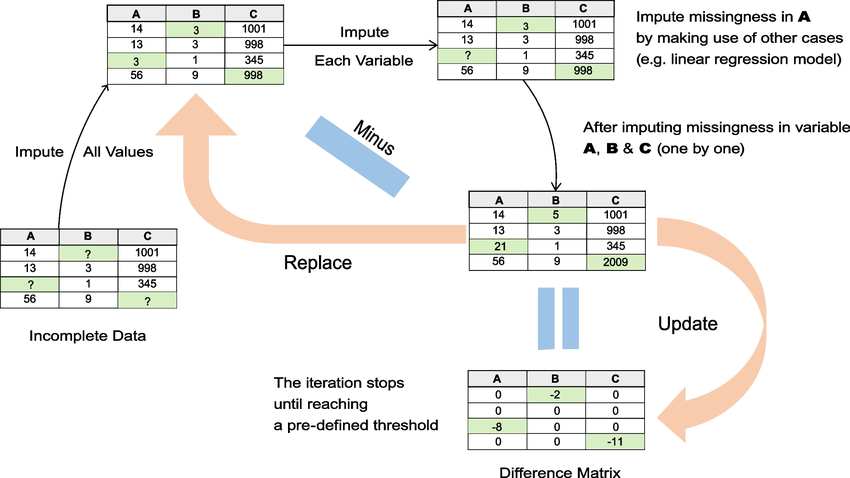


In [ ]:
import numpy as np
import pandas as pd
from fancyimpute import IterativeImputer

# Create a sample dataset with missing values
data = {
    'A': [1, 2, np.nan, 4, 5],
    'B': [np.nan, 2, 3, np.nan, 5],
    'C': [1, 2, 3, 4, 5]
}

df = pd.DataFrame(data)

# Apply MICE for imputation
imputer = IterativeImputer(max_iter=10, random_state=42)
imputed_data = imputer.fit_transform(df)

# Convert the result back to a DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=df.columns)

# Display the original and imputed DataFrames
print("Original DataFrame:")
print(df)
print("\nImputed DataFrame:")
print(imputed_df)

## Classification 

Classification is a fundamental task in machine learning and data analysis. It involves assigning predefined categories or labels to input data points based on their features or characteristics. The goal of classification is to build a predictive model that can automatically categorize new, unseen data points into one of the predefined classes.

Here's a simplified overview of the classification process:

1. Training Data: You start with a labeled dataset, where each data point is associated with a known category or class. This dataset is used to train the classification model.

2. Feature Extraction: Features or attributes are extracted from the data that provide relevant information for distinguishing between classes. These features can be numerical, categorical, or any other type of data.

3. Model Training: A machine learning algorithm, often a classification algorithm like decision trees, support vector machines, or neural networks, is trained on the labeled dataset. The model learns to recognize patterns or relationships between the features and the classes.

4. Model Evaluation: The trained model is evaluated using metrics like accuracy, precision, recall, F1-score, and others to assess its performance on a separate dataset, the test data. This helps determine how well the model can generalize to unseen data.

5. Inference: Once the model is trained and evaluated, it can be used to classify new, unlabeled data points into one of the predefined classes.

Classification has numerous applications, such as spam email detection, sentiment analysis, image recognition, medical diagnosis, and more. It plays a crucial role in making predictions and automating decision-making processes in various domains.

In [ ]:
#Load libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics



# Support Vector Machines

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. The advantages of support vector machines are: Effective in high dimensional spaces. Still effective in cases where number of dimensions is greater than the number of samples.

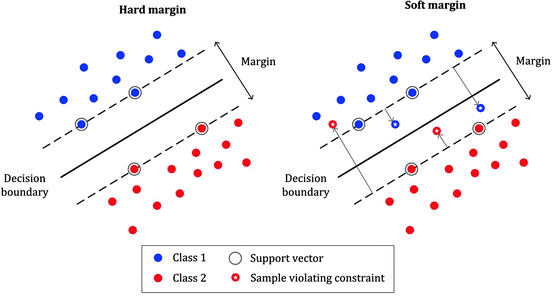




How is our data distributed?

Hard margin SVM does not allow any misclassification to happen.



#### Task 1: Complete the code for missing value imputation

In [ ]:
from sklearn.svm import SVC, LinearSVC
df_train = pd.read_csv('train.csv')
df_train = df_train.drop(columns=['Name', 'Ticket', 'Cabin', 'Embarked'])
df_test = pd.read_csv('test.csv')
df_test = df_test.drop(columns=['Name', 'Ticket', 'Cabin', 'Embarked'])

#Train -- SVM HARD MARGIN
df_train['Sex'] = df_train['Sex'].map({'male': 0, 'female': 1}).astype(int)

X = df_train[['Sex', 'Age', 'Pclass', 'SibSp','Parch','Fare']]

# Apply MICE for imputation but without target column
# <your code here based on the above code for imputation>

imputed_X = <your code>

# Taking the labels (Survived or Not Survived)
Y = df_train['Survived']

# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(imputed_X, Y, test_size=0.2, random_state=0)

# Declaring the SVC with no tunning
classifier = LinearSVC()

# Fitting the data. This is where the SVM will learn
classifier.fit(X_train, Y_train)

y_pred = classifier.predict(x_test)

print('Precision : ', np.round(metrics.precision_score(y_test, y_pred)*100,2))
print('Accuracy : ', np.round(metrics.accuracy_score(y_test, y_pred)*100,2))
print('Recall : ', np.round(metrics.recall_score(y_test, y_pred)*100,2))
print('F1 score : ', np.round(metrics.f1_score(y_test, y_pred)*100,2))
print('AUC : ', np.round(metrics.roc_auc_score(y_test, y_pred)*100,2))

##### Soft margin SVM: 
Allow SVM to make a certain number of mistakes and keep margin as wide as possible so that other points can still be classified correctly. 

In [ ]:
# Declaring the SVC with no tunning
classifier = SVC(C=1)

# Fitting the data. This is where the SVM will learn
classifier.fit(X_train, Y_train)

y_pred = classifier.predict(x_test)

#Evaluate model
print('Precision : ', np.round(metrics.precision_score(y_test, y_pred)*100,2))
print('Accuracy : ', np.round(metrics.accuracy_score(y_test, y_pred)*100,2))
print('Recall : ', np.round(metrics.recall_score(y_test, y_pred)*100,2))
print('F1 score : ', np.round(metrics.f1_score(y_test, y_pred)*100,2))
print('AUC : ', np.round(metrics.roc_auc_score(y_test, y_pred)*100,2))


#### Task 2: Modify the C value to find if the model improves or not and answer the following questions

1. Does the model improve when C is much smaller or much larger? Or it does not make any difference?
2. Based on your knowledge from the lecture, is this data mostly linearly separable or mostly not? Why?
3. For the best results, does the margin become larger or smaller?


# K-Nearest Neighbours

This code is just for your information. Run it and observe results. Is it better or worse than from the previous models?

In [ ]:
#Train kNN
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier( )
k_range = list(range(1,10))
weights_options = ['uniform','distance']
k_grid = dict(n_neighbors=k_range, weights = weights_options)
grid = GridSearchCV(knn, k_grid, cv=10, scoring = 'precision')
grid.fit(X_train, Y_train)
print ("Best Score: ",str(grid.best_score_))

# Logistic Regression

#### Task 3: Complete the following code, run it, and compare results with previous models.

In [ ]:
#Train logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

### your code here ###

#Evaluate model
print('Precision : ', np.round(metrics.precision_score(y_test, y_pred)*100,2))
print('Accuracy : ', np.round(metrics.accuracy_score(y_test, y_pred)*100,2))
print('Recall : ', np.round(metrics.recall_score(y_test, y_pred)*100,2))
print('F1 score : ', np.round(metrics.f1_score(y_test, y_pred)*100,2))
print('AUC : ', np.round(metrics.roc_auc_score(y_test, y_pred)*100,2))


# Naive Bayes

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.

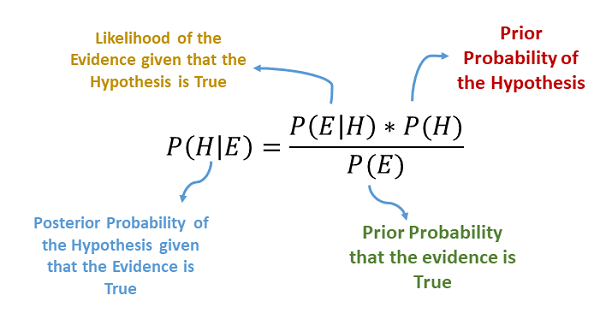

Using Bayes theorem, we can find the probability of A happening, given that B has occurred. Here, B is the evidence and A is the hypothesis. The assumption made here is that the predictors/features are independent. That is presence of one particular feature does not affect the other. Hence it is called naive.

More reading: https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c

### Task 4: Complete the following code, run it, and compare results with previous models.

In [ ]:
from sklearn.naive_bayes import GaussianNB


#### your code here ####

#Evaluate model
print('Precision : ', np.round(metrics.precision_score(y_test, y_pred)*100,2))
print('Accuracy : ', np.round(metrics.accuracy_score(y_test, y_pred)*100,2))
print('Recall : ', np.round(metrics.recall_score(y_test, y_pred)*100,2))
print('F1 score : ', np.round(metrics.f1_score(y_test, y_pred)*100,2))
print('AUC : ', np.round(metrics.roc_auc_score(y_test, y_pred)*100,2))


# Multilayer Perceptron
Multi layer perceptron (MLP) is a supplement of feed forward neural network. 
It consists of three types of layers:
- the input layer
- output layer
- hidden layer 
The input layer receives the input signal to be processed.

Layers after the input layer are called hidden layers because they are not directly exposed to the input. The simplest network structure is to have a single neuron in the hidden layer that directly outputs the value.

The final hidden layer is called the output layer, and it is responsible for outputting a value or vector of values that correspond to the format required for the problem.

#### Task 5: Run the following code, then do the following experiments

1. Remove dropouts and rerun
2. Enable bias for all layers, rerun
3. Enable verbose, try to use more epochs and observe if accuracy increases or stays unchanged
4. Now add validation split of 0.2, rerun
5. You can do more experimets in your own time.

**Compare and discuss results of these experiments** 

Did you get better results than in previous models?

You can use keras documentation here: https://keras.io/api/models/ 


In [ ]:
# source: https://www.kaggle.com/code/theblackmamba31/titanic-tutorial-neural-network
import tensorflow as tf
import keras 
from keras.layers import Dense, Dropout, Input
from keras.models import Sequential
from sklearn import metrics

print(X_train.shape)

model = Sequential()
model.add(Dense(units = 32, input_shape = (6,), activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu', kernel_initializer = 'he_normal', use_bias = False))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(units = 128, activation = 'relu',kernel_initializer = 'he_normal', use_bias = False))
model.add(Dropout(0.1))
model.add(Dense(units = 64, activation = 'relu',kernel_initializer = 'he_normal', use_bias = False))
model.add(Dropout(0.1))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 8, activation = 'relu',kernel_initializer = 'he_normal', use_bias = False))
model.add(Dense(units =1 , activation = 'sigmoid'))

model.compile(loss = tf.keras.losses.binary_crossentropy, optimizer = tf.keras.optimizers.Adam(), metrics = ['acc'])
model.fit(X_train, Y_train, batch_size = 32, verbose = 0, epochs = 50)

predict = model.predict(x_test)
#since we have use sigmoid activation function in output layer

y_pred = (model.predict(x_test) > 0.5).astype(int)

#Evaluate model
print('Precision : ', np.round(metrics.precision_score(y_test, y_pred)*100,2))
print('Accuracy : ', np.round(metrics.accuracy_score(y_test, y_pred)*100,2))
print('Recall : ', np.round(metrics.recall_score(y_test, y_pred)*100,2))
print('F1 score : ', np.round(metrics.f1_score(y_test, y_pred)*100,2))
print('AUC : ', np.round(metrics.roc_auc_score(y_test, y_pred)*100,2))
